In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm,os
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from math import pi, cos, sin 
import time


In [12]:
# cross-sectional law function

# f -- cosine
def f1(x): 
    function = -cos(2*pi*x/l)
    first_derivative = (2*pi/l) * sin(2*pi*x/l)
    second_derivative = (2*pi/l)**2 * cos(2*pi*x/l)
    return np.array([function, first_derivative, second_derivative], float)

# f -- polynomial
def f2(x):
    function = 2*( -6*x**2/l**2 + 6*x/l - 1)
    first_derivative = 12/l * (-2*x/l + 1)
    second_derivative = - 24/l**2
    return np.array([function, first_derivative, second_derivative], float)
    

In [13]:
# new functions

# f -- cosine
def f3(x): 
    function = cos(pi*x/l)
    first_derivative = -(pi/l) * sin(pi*x/l)
    second_derivative = -(pi/l)**2 * cos(pi*x/l)
    return np.array([function, first_derivative, second_derivative], float)
    
# f -- polynomial
def f4(x): 
    function = 1-2*x/l
    first_derivative = -2/l
    second_derivative = 0
    return np.array([function, first_derivative, second_derivative], float)

In [4]:
# def f5(x): 
#     if x < l/2:
#         function = 1
#     elif x >= l/2:
#         function = -1
#     first_derivative = 0
#     second_derivative = 0
#     return np.array([function, first_derivative, second_derivative], float)

In [14]:
def f6(x):
    function =  6*x**2/l**2 - 6*x/l + 1
    first_derivative = 6/l * (2*x/l - 1)
    second_derivative = 12/l**2
    return np.array([function, first_derivative, second_derivative], float)

# def f7(x):
#     function = 1 - pi/2*sin(pi*x/l)
#     first_derivative = -pi**2/(2*l)*cos(pi*x/l)
#     second_derivative = pi**3/(2*l**2)*sin(pi*x/l)
#     return np.array([function, first_derivative, second_derivative], float)

def f8(x):
    function = cos(4*pi*x/l)
    first_derivative = -4*pi/l*sin(4*pi*x/l)
    second_derivative = -(4*pi/l)**2 * cos(4*pi*x/l)
    return np.array([function, first_derivative, second_derivative], float)

In [15]:
def a_33(x, eps, f):
    return -8*eps*f(x)[1] / (1+eps*f(x)[0])
def a_32(x, eps, alpha, f):
    return -(alpha**2 / (1+eps*f(x)[0])**4 + 12*(eps*f(x)[1])**2 / (1+eps*f(x)[0])**2 + 4*eps*f(x)[2] / (1+eps*f(x)[0]))

# the right side of the differential equation
def Ay(x, y, eps, alpha, f):
    A = np.array([
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], float)
    A[0][1] = float(1)
    A[1][2] = float(1)
    A[2][3] = float(1)
    A[3][2] = a_32(x, eps, alpha, f)
    A[3][3] = a_33(x, eps, f)
    return np.dot(A, y)

In [16]:
def RKF(x, h, y_0, eps, alpha, f):
    def increment(x, y, h, eps, alpha, f):
        k1 = h * Ay(x            , y                                                             , eps, alpha, f)
        k2 = h * Ay(x + (1/4)*h  , y + (1/4)*k1                                                  , eps, alpha, f)
        k3 = h * Ay(x + (3/8)*h  , y + (3/32)*k1 + (9/32)*k2                                     , eps, alpha, f)
        k4 = h * Ay(x + (12/13)*h, y + (1932/2197)*k1 - (7200/2197)*k2 + (7296/2197)*k3          , eps, alpha, f)
        k5 = h * Ay(x + h        , y + (439/216)*k1 - 8*k2 + (3680/513)*k3 - (845/4104)*k4       , eps, alpha, f)
        k6 = h * Ay(x + (1/2)*h  , y - (8/27)*k1 + 2*k2-(3544/2565)*k3 +(1859/4104)*k4-(11/40)*k5, eps, alpha, f)
        return (16/135)*k1+(6656/12825)*k3+(28561/56430)*k4-(9/50)*k5+(2/55)*k6
    y = [] # array of vectors
    y_i = y_0
    y.append(y_0)
    for x_i in x[1:]:
        y_i = y_i + increment(x_i, y_i, h, eps, alpha, f)
        y.append(y_i)
    return np.array(y)

In [7]:
def Det2(x, u, v, eps, alpha, f):
    a = float(1)
    b = alpha**2 / (1+eps*f(x[N])[0])**4
    c11 = u[N][2]
    c12 = v[N][2]
    c21 = a*u[N][3] + b*u[N][1]
    c22 = a*v[N][3] + b*v[N][1]
    return c11*c22 - c12*c21

In [17]:
def Det(x, u, v, eps, alpha, f):
    c11 = u[N][0]
    c12 = v[N][0]
    c21 = u[N][1]
    c22 = v[N][1]
    return c11*c22 - c12*c21

In [21]:
def alpha_binary_search(u0, v0, alphaMAX, alphaMIN, x, h, eps, f):
    arguments_for_RKF = [x, h, u0, eps, alphaMIN, f]
    u = RKF(*arguments_for_RKF)
    arguments_for_RKF = [x, h, v0, eps, alphaMIN, f]
    v = RKF(*arguments_for_RKF)
    arguments_for_Det = [x, u, v, eps, alphaMIN, f]
    Dmin = Det(*arguments_for_Det)

    M = 50
    delta = (alphaMAX - alphaMIN)/M
    for i in range(M):
        alphaMAX = alphaMIN + delta
        
        arguments_for_RKF = [x, h, u0, eps, alphaMAX, f]
        u = RKF(*arguments_for_RKF)
        arguments_for_RKF = [x, h, v0, eps, alphaMAX, f]
        v = RKF(*arguments_for_RKF)
        arguments_for_Det = [x, u, v, eps, alphaMAX, f]
        Dmax = Det(*arguments_for_Det)
        
        if Dmin * Dmax <= 0:
            break 
        alphaMIN = alphaMAX
        Dmin = Dmax
    D = Dmax
    while abs(D) > err:
        alpha = (alphaMAX + alphaMIN)/2.0
        
        arguments_for_RKF = [x, h, u0, eps, alpha, f]
        u = RKF(*arguments_for_RKF)
        
        arguments_for_RKF = [x, h, v0, eps, alpha, f]
        v = RKF(*arguments_for_RKF)
        
        arguments_for_Det = [x, u, v, eps, alpha, f]
        D = Det(*arguments_for_Det)
        #print(Dmin, D, Dmax, alpha)
        if D*Dmin <= 0:
            Dmax = D
            alphaMAX = alpha
        elif D*Dmax <= 0:
            Dmin = D
            alphaMIN = alpha
    return alpha    

In [22]:
l = 6.0 # rod lenght
N = int(50)
h = l / N
err = h**10
k = 1 # the solution w can be found accurate to the coefficient k

initial_state_u = np.array([0.0, 0.0, 1.0, 0.0], float)
initial_state_v = np.array([0.0, 0.0, 0.0, 1.0], float)
x = np.array([i*h if h < l else l for i in range(N+1)], float)

u0 = initial_state_u
v0 = initial_state_v

In [23]:
# SEARCH ALPHA(EPSILON) FOR F6 AND F8  rigid termination       #############################################################

alphaMIN = 0.1
alphaMAX = 4*pi/l
eps_max = 0.2
e = float(eps_max/N)
Eps = np.array([ i*e if i*e < eps_max  else eps_max  for i in range(N+1)], float) 
Alpha_cosine = []
Alpha_polinomial = []

start = time.monotonic()
for epsilon in Eps:
    arg_cosine = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f8]
    Alpha_cosine.append(alpha_binary_search(*arg_cosine))
    
    arg_polinomial = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f6]
    Alpha_polinomial.append(alpha_binary_search(*arg_polinomial))
end = time.monotonic()

1.0471975541246334


In [25]:
Alpha_cosine = np.array(Alpha_cosine, float)
Alpha_polinomial = np.array(Alpha_polinomial, float)
print ('Альфы считались ', int((end-start)//60), ' минут и ', int((end-start)%60), 'секунд')

Альфы считались  12  минут и  12 секунд


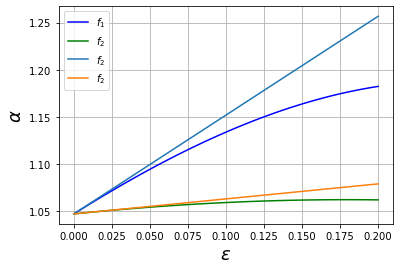

In [29]:
# PLOTS ALPHA(EPSILON) FOR F6 AND F7
ax = plt.gca()

ax.plot(Eps,     Alpha_cosine, label = r'$ f_1 $', color ='b')
ax.plot(Eps, Alpha_polinomial, label = r'$ f_2 $', color ='g')
ax.plot(Eps, 2*pi/l +  Eps*2*pi/l, label = r'$ f_2 $')
ax.plot(Eps, 2*pi/l +  Eps*3/(pi*l), label = r'$ f_2 $')
2*pi/l +  Eps[i]*2*pi/l
ax.set_xlabel(r'$\varepsilon$', fontsize=18)
ax.set_ylabel(r'$\alpha$', fontsize=18)
ax.legend()
ax.grid(True)

In [32]:
for i in [0, 10, 20, 30, 40]:
    #  
    print("%.2f %.7f %.7f %.7f %.7f" %(
        Eps[i],                      # epsilon
        2*pi/l +  Eps[i]*3/(pi*l),   # assimpt for polinomial
        Alpha_polinomial[i] ,        # numerical for polinomial
        2*pi/l +  Eps[i]*2*pi/l,     # assimpt for cosine
        Alpha_cosine[i]              # numerical for cosine
    ))

0.00 1.0471976 1.0471976 1.0471976 1.0471976
0.04 1.0535637 1.0530814 1.0890855 1.0856017
0.08 1.0599299 1.0575619 1.1309734 1.1191512
0.12 1.0662961 1.0605859 1.1728613 1.1470282
0.16 1.0726623 1.0621034 1.2147492 1.1683722


In [11]:
# SEARCH ALPHA(EPSILON) FOR F1 AND F2                           ############################################################
eps_max = 0.2
e = float(eps_max/N)
Eps = np.array([ i*e if i*e < eps_max  else eps_max  for i in range(N+1)], float) 
Alpha_cosine = []
Alpha_polinomial = []
start = time.monotonic()

for epsilon in Eps:
    arg_cosine = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f1]
    Alpha_cosine.append(alpha_binary_search(*arg_cosine))
    
    arg_polinomial = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f2]
    Alpha_polinomial.append(alpha_binary_search(*arg_polinomial))
end = time.monotonic()

In [12]:
Alpha_cosine = np.array(Alpha_cosine, float)
Alpha_polinomial = np.array(Alpha_polinomial, float)
print ('Альфы считались ', (end-start)//60, ' минут и ', (end-start)%60, 'секунд')

Альфы считались  7.0  минут и  12.98399999999674 секунд


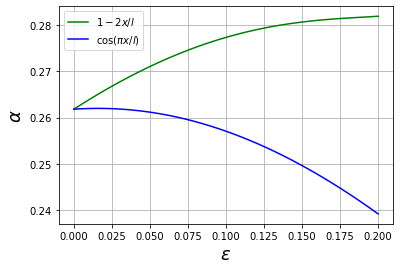

In [25]:
# PLOTS ALPHA(EPSILON) FOR F1 AND F2
ax = plt.gca()

ax.plot(Eps, Alpha_polinomial, label = r'$ polinomial $', color ='g')
ax.plot(Eps,     Alpha_cosine, label = r'$ cosine $', color ='b')


ax.set_xlabel(r'$\varepsilon$', fontsize=18)
ax.set_ylabel(r'$\alpha$', fontsize=18)
ax.legend()
ax.grid(True)

In [60]:
# SEARCH ALPHA(EPSILON) FOR F5                                  ############################################################
eps_max = 0.2
e = float(eps_max/N)
Eps = np.array([ i*e if i*e < eps_max  else eps_max  for i in range(N+1)], float) 
Alpha_stepfun = []

start = time.monotonic()
for epsilon in Eps:
    arg_stepfun = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f5]
    Alpha_stepfun.append(alpha_binary_search(*arg_stepfun))
end = time.monotonic()

In [61]:
Alpha_stepfun = np.array(Alpha_stepfun, float)
print ('Альфы считались ', (end-start)//60, ' минут и ', (end-start)%60, 'секунд')
print(x[N]>= l/2)

Альфы считались  2.0  минут и  35.36000000000058 секунд
True


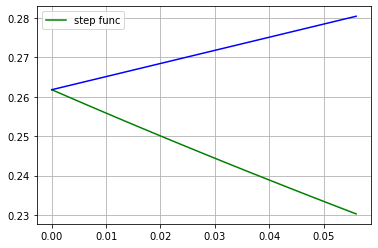

In [68]:
ax = plt.gca()
c1 = (Alpha_stepfun[0]*Eps[N] - Alpha_stepfun[N]*Eps[0])/(Eps[N]-Eps[0])
c2 = (Alpha_stepfun[N] - Alpha_stepfun[0])/(Eps[N]-Eps[0])
ax.plot(Eps[0:15], Alpha_stepfun[0:15], label = r'step func', color ='g')
ax.plot(Eps[0:15], pi/(2*l)+(2/l)*Eps[0:15], color ='b')
ax.legend()
ax.grid(True)

In [10]:
# SEARCH ALPHA(EPSILON) FOR F3 AND F4                           ############################################################
eps_max = 0.2
e = float(eps_max/N)
Eps = np.array([ i*e if i*e < eps_max  else eps_max  for i in range(N+1)], float) 
Alpha_cosine = []
Alpha_polinomial = []

start = time.monotonic()
for epsilon in Eps:
    arg_cosine = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f3]
    Alpha_cosine.append(alpha_binary_search(*arg_cosine))
    
    arg_polinomial = [u0, v0, alphaMAX, alphaMIN, x, h, epsilon, f4]
    Alpha_polinomial.append(alpha_binary_search(*arg_polinomial))
end = time.monotonic()

In [12]:
Alpha_cosine = np.array(Alpha_cosine, float)
Alpha_polinomial = np.array(Alpha_polinomial, float)
print ('Альфы считались ', (end-start)//60, ' минут и ', (end-start)%60, 'секунд')

Альфы считались  6.0  минут и  14.015000000000327 секунд


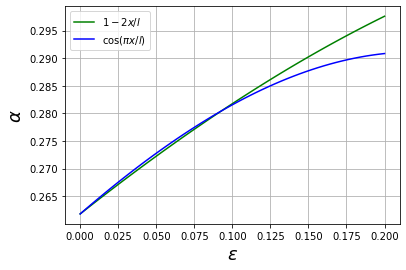

In [30]:
# PLOTS ALPHA(EPSILON) FOR F1 AND F2 [0:15]
ax = plt.gca()

ax.plot(Eps, Alpha_polinomial, label = r'$1 - 2x/l$', color ='g')
ax.plot(Eps,     Alpha_cosine, label = r'$ \cos(\pi x/l) $', color ='b')
#ax.plot(Eps,     pi/(2*l) +  Eps*pi/(2*l), label = r'$ cosine assimpt $', color ='r')
#ax.plot(Eps,     pi/(2*l) +  Eps*4/(pi*l), label = r'$ polinom assimpt $', color ='y')

ax.set_xlabel(r'$\varepsilon$', fontsize=18)
ax.set_ylabel(r'$\alpha$', fontsize=18)
ax.legend()
ax.grid(True)

In [28]:
for i in [0, 10, 20, 30, 40]:
    #  
    print("%.2f %.7f %.7f %.7f %.7f" %(
        Eps[i],                      # epsilon
        pi/(2*l) +  Eps[i]*pi/(2*l), # assimpt for cosine
        Alpha_polinomial[i] ,        # numerical for cosine
        pi/(2*l) +  Eps[i]*4/(pi*l), # assimpt for polinomial
        Alpha_cosine[i]              # numerical for polinomial
    ))

0.00 0.2617994 0.2617994 0.2617994 0.2617994
0.04 0.2722714 0.2702356 0.2702877 0.2707507
0.08 0.2827433 0.2780791 0.2787759 0.2783453
0.12 0.2932153 0.2852840 0.2872642 0.2843707
0.16 0.3036873 0.2918059 0.2957524 0.2886095


In [ ]:
ax = plt.gca()

ax.plot(Eps, Alpha_polinomial, label = r'$1 - 2x/l$', color ='g')
ax.plot(Eps,     Alpha_cosine, label = r'$ \cos(\pi x/l) $', color ='b')


ax.set_xlabel(r'$\varepsilon$', fontsize=18)
ax.set_ylabel(r'$\alpha$', fontsize=18)
ax.legend()
ax.grid(True)